In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)


In [6]:
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7a31667ae53bff9c52d3be2b33488e0&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [12]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 49.71,
  'feels_like': 47.46,
  'temp_min': 41.67,
  'temp_max': 55.36,
  'pressure': 1008,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 130},
 'clouds': {'all': 100},
 'dt': 1648736508,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648722499,
  'sunset': 1648768089},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cairns
Processing Record 2 of Set 1 | pompton lakes
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | borgarnes
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | pangai
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | darab
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | chuka
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | tazmalt
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | buchanan
Processing Record 24 of Set 1 

Processing Record 40 of Set 4 | kushima
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | dandong
Processing Record 43 of Set 4 | darhan
Processing Record 44 of Set 4 | humberto de campos
Processing Record 45 of Set 4 | tacna
Processing Record 46 of Set 4 | marv dasht
City not found. Skipping...
Processing Record 47 of Set 4 | stara vyzhivka
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | san nicolas
Processing Record 1 of Set 5 | diapaga
Processing Record 2 of Set 5 | balauseri
Processing Record 3 of Set 5 | cayenne
Processing Record 4 of Set 5 | nuuk
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | lundazi
Processing Record 7 of Set 5 | barmer
Processing Record 8 of Set 5 | evensk
Processing Record 9 of Set 5 | adrar
Processing Record 10 of Set 5 | grand gaube
Processing Record 11 of Set 5 | souillac
Processing Record 12 of Set 5 | burkhala
City

Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | tabou
Processing Record 30 of Set 8 | marihatag
Processing Record 31 of Set 8 | bouna
Processing Record 32 of Set 8 | mehndawal
Processing Record 33 of Set 8 | halifax
Processing Record 34 of Set 8 | isla vista
Processing Record 35 of Set 8 | nantucket
Processing Record 36 of Set 8 | daru
Processing Record 37 of Set 8 | bouar
Processing Record 38 of Set 8 | san pedro
Processing Record 39 of Set 8 | talas
Processing Record 40 of Set 8 | asau
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | karachi
Processing Record 43 of Set 8 | longlac
City not found. Skipping...
Processing Record 44 of Set 8 | krasnokamensk
Processing Record 45 of Set 8 | garden city
Processing Record 46 of Set 8 | antalaha
Processing Record 47 of Set 8 | kropotkin
Processing Record 48 of Set 8 | aden
Processing Record 49 of Set 8 | sitka
Processing Record 50 of Set 8 | amderma
City not found. Skipping...
Processing Record 1

Processing Record 16 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 12 | fare
Processing Record 18 of Set 12 | biak
Processing Record 19 of Set 12 | ust-tsilma
Processing Record 20 of Set 12 | devarkonda
Processing Record 21 of Set 12 | salinopolis
Processing Record 22 of Set 12 | henties bay
Processing Record 23 of Set 12 | nova olinda do norte
Processing Record 24 of Set 12 | buqayq
City not found. Skipping...
Processing Record 25 of Set 12 | xianshuigu
Processing Record 26 of Set 12 | gornyye klyuchi
Processing Record 27 of Set 12 | tawnat
City not found. Skipping...
Processing Record 28 of Set 12 | spearfish
Processing Record 29 of Set 12 | singaraja
Processing Record 30 of Set 12 | bandar-e anzali
Processing Record 31 of Set 12 | wainwright
Processing Record 32 of Set 12 | raudeberg
Processing Record 33 of Set 12 | mildura
Processing Record 34 of Set 12 | asyut
Processing Record 35 of Set 12 | umea
Processing Record 36 of Set 12 | lhokseumawe
Process

In [15]:
len(city_data)

562

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cairns,-16.9167,145.7667,71.55,82,18,0.00,AU,2022-03-31 14:23:31
1,Pompton Lakes,41.0054,-74.2907,58.28,92,100,1.99,US,2022-03-31 14:23:32
2,Mataura,-46.1927,168.8643,46.63,93,100,2.89,NZ,2022-03-31 14:23:32
3,Borgarnes,64.5383,-21.9206,42.66,62,96,1.41,IS,2022-03-31 14:23:32
4,Rikitea,-23.1203,-134.9692,77.70,74,82,16.62,PF,2022-03-31 14:23:32
5,Pangai,-19.8000,-174.3500,81.52,78,100,12.03,TO,2022-03-31 14:23:33
6,Busselton,-33.6500,115.3333,72.64,66,0,10.11,AU,2022-03-31 14:23:33
7,Bathsheba,13.2167,-59.5167,75.81,83,75,10.36,BB,2022-03-31 14:23:34
8,Darab,28.7519,54.5444,82.00,11,23,5.99,IR,2022-03-31 14:23:34
9,Provideniya,64.3833,-173.3000,20.43,88,100,19.15,RU,2022-03-31 14:23:34


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cairns,AU,2022-03-31 14:23:31,-16.9167,145.7667,71.55,82,18,0.00
1,Pompton Lakes,US,2022-03-31 14:23:32,41.0054,-74.2907,58.28,92,100,1.99
2,Mataura,NZ,2022-03-31 14:23:32,-46.1927,168.8643,46.63,93,100,2.89
3,Borgarnes,IS,2022-03-31 14:23:32,64.5383,-21.9206,42.66,62,96,1.41
4,Rikitea,PF,2022-03-31 14:23:32,-23.1203,-134.9692,77.70,74,82,16.62
5,Pangai,TO,2022-03-31 14:23:33,-19.8000,-174.3500,81.52,78,100,12.03
6,Busselton,AU,2022-03-31 14:23:33,-33.6500,115.3333,72.64,66,0,10.11
7,Bathsheba,BB,2022-03-31 14:23:34,13.2167,-59.5167,75.81,83,75,10.36
8,Darab,IR,2022-03-31 14:23:34,28.7519,54.5444,82.00,11,23,5.99
9,Provideniya,RU,2022-03-31 14:23:34,64.3833,-173.3000,20.43,88,100,19.15


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

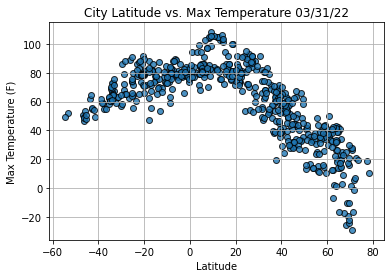

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

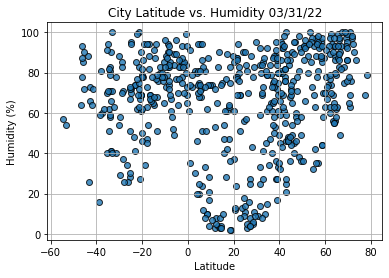

In [30]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

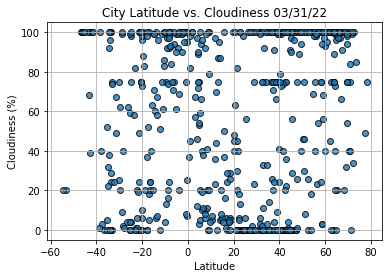

In [32]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

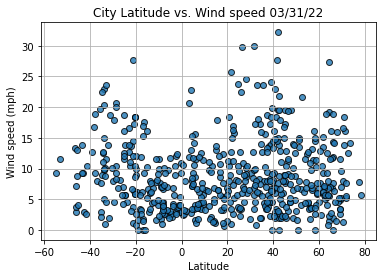

In [34]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pompton Lakes,US,2022-03-31 14:23:32,41.0054,-74.2907,58.28,92,100,1.99
3,Borgarnes,IS,2022-03-31 14:23:32,64.5383,-21.9206,42.66,62,96,1.41
7,Bathsheba,BB,2022-03-31 14:23:34,13.2167,-59.5167,75.81,83,75,10.36
8,Darab,IR,2022-03-31 14:23:34,28.7519,54.5444,82.00,11,23,5.99
9,Provideniya,RU,2022-03-31 14:23:34,64.3833,-173.3000,20.43,88,100,19.15


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

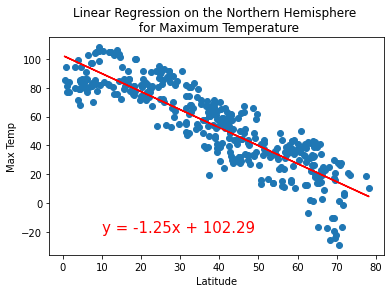

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

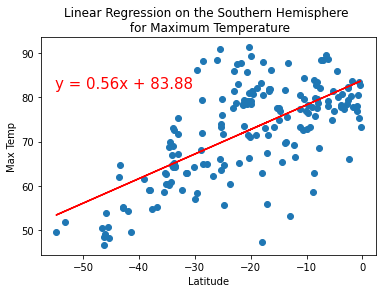

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,82))

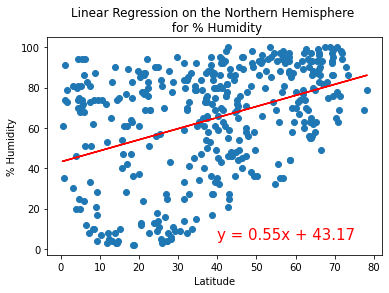

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,5))

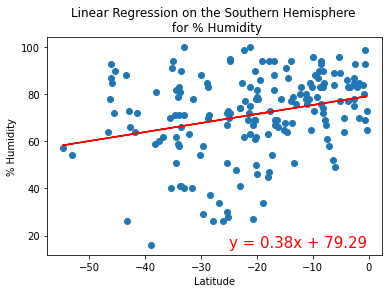

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

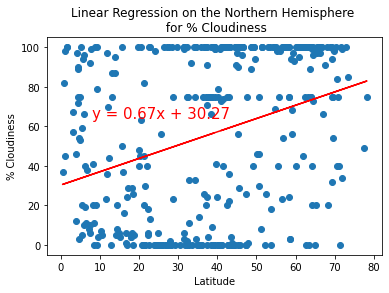

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(8,64))

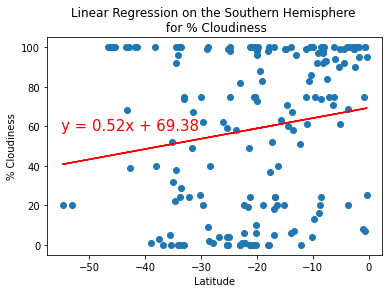

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,58))

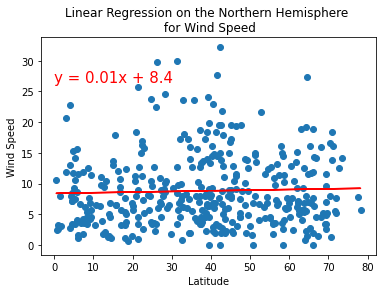

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,26.5))

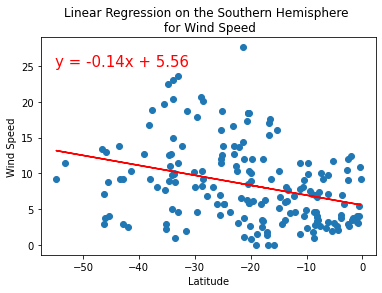

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,25))